# Gradient Descent Optimization for Machine Learning

## Gradient Descent with Momentum 

In [1]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import pylab as plt
import matplotlib.cm as cm
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image as im
import math
import time 
import pylab as pb
from IPython.display import display
from IPython.display import Image

#For multiple linear regression
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from sklearn import datasets #import datasets from scikit-learn

import pandas as pd

import time

#Gradient Descent

The supervised problem will be deﬁned by a matrix of points X of dimensionality N × n, and the corresponding target variable for the regression problem, a vector y of dimensionality N. 

N vectors of n dimensionality=>X

An output array of dimensionality N => y

The multiple linear regression model is deﬁned as M(x) = θ0 + θ1x1 + θ2x2 + ... + θnxn.

In [2]:
#Function to calculate the predictions of a model and then the MSE value, given a set of
#(θ0,θ1,...,θn) parameters, the feature matrix data and the real regression values
def modelMSE(parameters, data, y):
  #Make the predictions given the parameters => θ0 + θ1x1 + θ2x2 + ... + θnxn
  predictions=parameters[0] + data.dot(parameters[1:len(parameters)])
  #Calculate the mean squared error
  mse=mean_squared_error(y.T,predictions)
  return predictions, mse

### Normal Stochastic Gradient

In [3]:
def stochasticGradientDescent(X,y,parameters, learningRate, iterations):

  #Define N with the length of y, number of vectors that are in the matrix X
  N=len(y)

  #Array of 0s, to save in each iteration the error of the model
  allErrors=np.zeros(iterations)
  for j in range(0,iterations):
    error=0.0
    #Shuffle X and y
    X, y = shuffle(X, y)
    #parameter update is performed for each xi and label yi
    for i in range(0,N):
      #A random integer between 0 and N
      r=np.random.randint(0,N)
      Xi=X[r].reshape(1,X.shape[1])
      #Put y in vector (from column) and take the r index
      yi=y.T[r].reshape(1,1)
      #Calculate the prediction of the model and the mean squared error
      predictions, mse= modelMSE(parameters,Xi, yi)
      #Make the distance value intro an array, so we can then multiply row(d)*column(X)
      d=np.full(len(Xi[0]),predictions-yi)
      #Update parameters, the 2 is from the derivative of the mse function, len(y)=N or m in some papers
      parameters=parameters - 2/len(y)*learningRate* (Xi.dot(d))
      #Add to the error
      error= error + mse
    #Save the current iteration's error
    allErrors[j]=error
  #Return the optimized parameters and the error progression
  return parameters, allErrors

### Stochastic Gradient with Momentum

In [4]:
#vt = γvt−1 + η∇θJ(θ)
#θ = θ−vt
def stochasticMomentum(X,y,parameters, velocity, gamma, learningRate, iterations):
  #Define N with the length of y, number of vectors that are in the matrix X
  N=len(y)
  previousVelocity=np.copy(velocity)
  #Array of 0s, to save in each iteration the error of the model
  allErrors=np.zeros(iterations)
  for j in range(0,iterations):
    error=0.0
    #parameter update is performed for each xi and label yi
    for i in range(0,N):
      #A random integer between 0 and N
      r=np.random.randint(0,N)
      Xi=X[r].reshape(1,X.shape[1])
      #Put y in vector (from column) and take the r index
      yi=y.T[r].reshape(1,1)
      #Calculate the prediction of the model and the mean squared error
      predictions, mse= modelMSE(parameters,Xi, yi)
      #Make the distance value intro an array, so we can then multiply row(d)*column(X)
      d=np.full(len(Xi[0]),predictions-yi)
      #Update velocity, given the previous velocity and the derivative of the cost function mse
      velocity= gamma*previousVelocity + 2/len(y)*learningRate* (Xi.dot(d))
      #Update parameters, the 2 is from the derivative of the mse function, len(y)=N or m in some papers
      parameters=parameters-velocity
      #Add to the error
      error= error + mse
      #Update the previous velocity with the current velocity
      previousVelocity=velocity
    #Save the current iteration's error
    allErrors[j]=error
  #Return the optimized parameters and the error progression
  return parameters, allErrors

#SGD with a known linear function (all coefficients known)

### Comparison between SGD and SGD+Momentum

################ Normal SGD ################
Optimized Theta values SGD: [2.91345532 2.87662244 2.94184804]
Last error SGD: 3.310136559838326
################ SGD with Momentum ################
Optimized Theta values SGD Momentum: [2.95133678 2.9145039  2.9797295 ]
Last error SGD Momentum: 4.951163645589544
################ Execution time ################
Time of execution in seconds: 38.43 


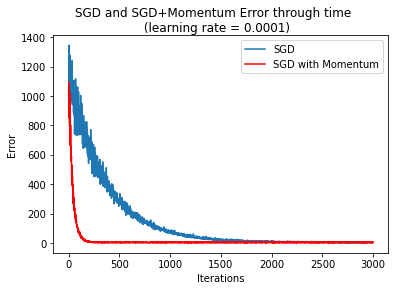

In [7]:
start_time = time.time()

#Setting the parameters for the SGD and SGD with momentum
iter=3000
#Good initial learning rate 1e-5
#Best learning rate found for this dataset 1e-3
learningRate=1e-4

#Creating the testing data set, were y=4 + 3X1 + 2X2
X = 2 * np.random.rand(20,2)
y = 4 + (3*X[:,0]) + (2*X[:,1])

#Random starting parameters from 0 to 1
params=np.random.rand((len(X[0])+1))

#The first comparison will be between SGD and SGD with momentum
predict, errors= stochasticGradientDescent(X,y,params,learningRate,iter)
print("################ Normal SGD ################")
print("Optimized Theta values SGD:", predict)
print("Last error SGD:", errors[len(errors)-1])
plt.plot(errors, label="SGD")

#More parameters for SGD with momentum
#Initial velocity set to zeros
vel=np.zeros(len(params))
#Best initial gamma parameter
gamma=0.9

predict, errors= stochasticMomentum(X,y,params, vel,gamma,learningRate,iter)
print("################ SGD with Momentum ################")
print("Optimized Theta values SGD Momentum:", predict)
print("Last error SGD Momentum:", errors[len(errors)-1])
plt.plot(errors, color='red', label="SGD with Momentum")
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.suptitle('SGD and SGD+Momentum Error through time \n (learning rate = '+str(learningRate)+')')
plt.legend()
print("################ Execution time ################")
print("Time of execution in seconds: %.2f " % (time.time() - start_time))

# SGD with a Real Data Set

## Boston housing dataset

In [ ]:
start_time = time.time()

#https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston
#Using the boston data set from the sklearn library
data=datasets.load_boston()
#To see the full description of the data set
#print(data.DESCR)
#First 13 columns are the predictors, and the MEDV is the target class

#Separate de data into predictors and target classes
predictors=pd.DataFrame(data.data, columns=data.feature_names)
target=pd.DataFrame(data.target, columns=["MEDV"])
#print(predictors.isnull().values.any())

#Normalize the feature values, Feature scaling improves the convergence of steepest descent algorithms
normpredictors=(predictors-predictors.mean())/predictors.std()
#To use a numpy representation of the DataFrame, the .values attribute can be used
#Put the target data as an np array
targetarray=np.asarray(target.values).reshape(-1)
#Normalize the target values
targetarray=(targetarray-targetarray.mean())/targetarray.std()

#Setting the parameters for the SGD with momentum
iter=3000
#Best learning rate 5e-6
learningRate=5e-6
#Random starting parameters from 0 to 1
params=np.random.rand(predictors.shape[1]+1)
#Initial velocity set to zeros
vel=np.zeros(len(params))
#Best gamma parameter
gamma=0.9

predict, errors= stochasticMomentum(normpredictors.values,targetarray,params, vel,gamma,learningRate,iter)
print("Optimized Theta values", predict)
print("Last error", errors[len(errors)-1])
plt.plot(errors, color='red')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.suptitle('SGD+Momentum Error through time (Boston dataset)\n (learning rate = '+str(learningRate)+')')

print("################ Execution time ################")
print("Time of execution in seconds: %.2f " % (time.time() - start_time))

## Car Price Assignment dataset

In [ ]:
start_time = time.time()

# #Upload csv file
# from google.colab import files
# uploaded = files.upload()

#Read the data
data=pd.read_csv("CarPrice_Assignment.csv")
#Visualize the data
data.head()
#Each feature dtype
#data.info()

#Separate de data into predictors and target classes
predictors= data[['symboling','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']]
target=data[['price']]

#Normalize the feature values, Feature scaling improves the convergence of steepest descent algorithms
normpredictors=(predictors-predictors.mean())/predictors.std()
#To use a numpy representation of the DataFrame, the .values attribute can be used
#Put the target data as an np array
targetarray=np.asarray(target.values).reshape(-1)
#Normalize the target values
targetarray=(targetarray-targetarray.mean())/targetarray.std()

#Setting the parameters for the SGD with momentum
iter=3000
#Good initial learning rate 1e-5, or 1e-6
#learningRate=1e-6
learningRate=5e-6
#Random starting parameters from 0 to 1
params=np.random.rand(predictors.shape[1]+1)
#Initial velocity set to zeros
vel=np.zeros(len(params))
#Best initial gamma parameter
gamma=0.9

predict, errors= stochasticMomentum(normpredictors.values,targetarray,params, vel,gamma,learningRate,iter)
print("Optimized Theta values", predict)
print("Last error", errors[len(errors)-1])
plt.plot(errors, color='red')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.suptitle('SGD+Momentum Error through time (Car Price dataset)\n (learning rate = '+str(learningRate)+')')

print("################ Execution time ################")
print("Time of execution in seconds: %.2f " % (time.time() - start_time))